## Audio classification architectures

The goal of audio classification is to predict a class label for an audio input. The model can predict a single class label that covers the entire input sequence, or it can predict a label for every audio frame — typically every 20 milliseconds of input audio — in which case the model’s output is a sequence of class label probabilities. An example of the former is detecting what bird is making a particular sound; an example of the latter is speaker diarization, where the model predicts which speaker is speaking at any given moment.



### Classification using spectrograms

One of the easiest ways to perform audio classification is to pretend it’s an image classification problem!

Recall that a spectrogram is a two-dimensional tensor of shape (frequencies, sequence length). In the chapter on audio data we plotted these spectrograms as images. Guess what? We can literally treat the spectrogram as an image and pass it into a regular CNN classifier model such as ResNet and get very good predictions. Even better, we can use a image transformer model such as ViT.

This is what Audio Spectrogram Transformer does. It uses the ViT or Vision Transformer model, and passes it spectrograms as input instead of regular images. Thanks to the transformer’s self-attention layers, the model is better able to capture global context than a CNN is.

Just like ViT, the AST model splits the audio spectrogram into a sequence of partially overlapping image patches of 16×16 pixels. This sequence of patches is then projected into a sequence of embeddings, and these are given to the transformer encoder as input as usual. AST is an encoder-only transformer model and so the output is a sequence of hidden-states, one for each 16×16 input patch. On top of this is a simple classification layer with sigmoid activation to map the hidden-states to classification probabilities.

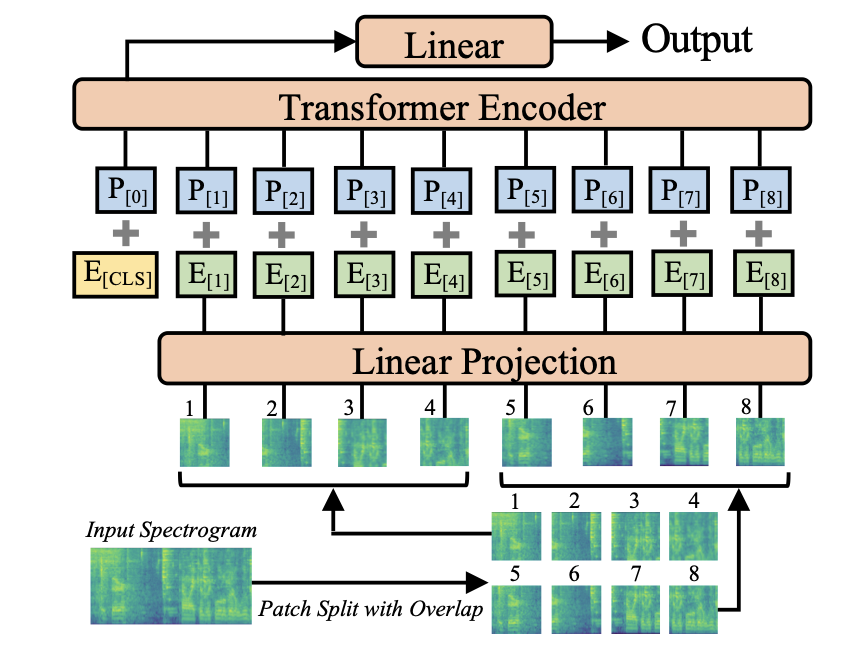

Image from the paper AST: Audio Spectrogram Transformer - https://arxiv.org/pdf/2104.01778

Even though here we pretend spectrograms are the same as images, there are important differences. For example, shifting the contents of an image up or down generally does not change the meaning of what is in the image. However, shifting a spectrogram up or down will change the frequencies that are in the sound and completely change its character. Images are invariant under translation but spectrograms are not. Treating spectrograms as images can work very well in practice, but keep in mind they are not really the same thing.

### Any transformer can be a classifier
In a previous section you’ve seen that CTC is an efficient technique for performing automatic speech recognition using an encoder-only transformer. Such CTC models already are classifiers, predicting probabilities for class labels from a tokenizer vocabulary. We can take a CTC model and turn it into a general-purpose audio classifier by changing the labels and training it with a regular cross-entropy loss function instead of the special CTC loss.

For example, HF Transformers has a Wav2Vec2ForCTC model but also Wav2Vec2ForSequenceClassification and Wav2Vec2ForAudioFrameClassification. The only differences between the architectures of these models is the size of the classification layer and the loss function used.

In fact, any encoder-only audio transformer model can be turned into an audio classifier by adding a classification layer on top of the sequence of hidden states. (Classifiers usually don’t need a transformer decoder.)

To predict a single classification score for the entire sequence (Wav2Vec2ForSequenceClassification), the model takes the mean over the hidden-states and feeds that into the classification layer. The output is a single probability distribution.

To make a separate classification for each audio frame (Wav2Vec2ForAudioFrameClassification), the classifier is run on the sequence of hidden-states, and so the output of the classifier is a sequence too.

### Further Reading

https://arxiv.org/pdf/2303.11607